In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [37]:
import requests
import json
from datetime import date, timedelta
from numpy import array
import pandas as pd
import nltk

    
dfnotas = pd.read_csv('NOTAS_CUERPO_VISTAS.csv')

dfnotas

,sitio,id,title,Fecha,url,editor,tags,cuerpo,Número de vistas de página
0,excelsior,1539165,Mujer golpea a sujeto que la asaltó… es exper...,12 sept 2022,https://www.excelsior.com.mx/nacional/mujer-go...,jcarlos.ponce,_Asaltos_Video_Seguridad_Jalisco_Estados,<p>Una cámara de seguridad capturó el momento ...,62408.0
1,excelsior,1538653,"¿Sabías que en México hay una familia real?, t...",9 sept 2022,https://www.excelsior.com.mx/trending/sabias-q...,beatriz.rodriguez,_Isabel II_Reina Isabel_Realeza_Historia de Mé...,"<p>Con el<a href=""https://www.excelsior.com.mx...",49664.0
2,excelsior,1540076,Hombre predice fecha de muerte de Carlos III; ...,16 sept 2022,https://www.excelsior.com.mx/trending/hombre-p...,eduardo.morales,_Rey Carlos III_Isabel II_Reino Unido_Viral,<p><strong>Carlos III</strong> apenas tiene un...,45734.0
3,excelsior,1538913,Su novio la dejó abrir OnlyFans y al mes… Yams...,11 sept 2022,https://www.excelsior.com.mx/trending/su-novio...,angel.salinas,_Onlyfans_Tiktok_Instagram_Trending_Viral_Rede...,<p>Entre la raza la conocen como <strong>Yamsi...,37041.0
4,excelsior,1537176,Joven encuentra miles de pesos en chamarra que...,2 sept 2022,https://www.excelsior.com.mx/trending/joven-de...,jorge.villarello,_Trending_Viral_Redes sociales_Tiktok,<p>Cuando alguien se encuentra dinero en la ca...,33069.0
...,...,...,...,...,...,...,...,...,...
745,excelsior,1539962,"""Te aplaudo y aguardo todo lo que vayas a hace...",15 sept 2022,https://www.excelsior.com.mx/te-aplaudo-y-agua...,enrique.lopez,NaN,NaN,NaN
746,excelsior,1538776,"Jeremías Conan Ledesma, portero del Cádiz, tuv...",10 sept 2022,https://www.excelsior.com.mx/jeremias-conan-le...,arturo.duran,Futbol Internacional,NaN,NaN
747,excelsior,1537952,"""Después de una primera evaluación (la lesión ...",6 sept 2022,https://www.excelsior.com.mx/despues-de-una-pr...,bernardo.ferreira,NaN,NaN,NaN
748,excelsior,1537667,"""Ahora tengo que volver a casa, tengo cosas má...",5 sept 2022,https://www.excelsior.com.mx/ahora-tengo-que-v...,enrique.lopez,NaN,NaN,NaN


In [38]:
no_palabras=[]
repetidas=[]
diccionario_frecuencias = {}
mas_repetidasaux=''
mas_repetidas=[]

dfnotas['title']=dfnotas['title'].astype(str)
dfnotas['cuerpo']=dfnotas['cuerpo'].astype(str)
dfnotas['tags']=dfnotas['tags'].astype(str)
dfnotas

for i in range(0,len(dfnotas.index)):

    titulo=dfnotas.iloc[i][2] #recorre los titulos del dt por fila

    tokens = nltk.word_tokenize(titulo)  #separa el titulo por palabras
    #tokens

    no_palabras.append(len(tokens))  #agrega a la lista la cantidad de palabras de cada titulo
    
    for palabra in tokens:
        if palabra in diccionario_frecuencias:
            diccionario_frecuencias[palabra] += 1
        else:
            diccionario_frecuencias[palabra] = 1

    for palabra in diccionario_frecuencias:
        frecuencia = diccionario_frecuencias[palabra]
    
        if frecuencia >= 2 : #Agrega todas las palabras que se repitan mas de dos veces
        
            mas_repetidas.append(palabra)
            mas_repetidasaux=mas_repetidasaux+palabra+","
    
 #   repetidas.append(mas_repetidasaux)
 #   mas_repetidasaux=''
    
    
    repetidas.append(mas_repetidas)
    mas_repetidas=[]
    diccionario_frecuencias = {}
    

dfnotas['No.Palabras Titulo']=no_palabras
dfnotas['Repetidas Titulo']=repetidas

dfnotas.head()


,sitio,id,title,Fecha,url,editor,tags,cuerpo,Número de vistas de página,No.Palabras Titulo,Repetidas Titulo
0,excelsior,1539165,Mujer golpea a sujeto que la asaltó… es exper...,12 sept 2022,https://www.excelsior.com.mx/nacional/mujer-go...,jcarlos.ponce,_Asaltos_Video_Seguridad_Jalisco_Estados,<p>Una cámara de seguridad capturó el momento ...,62408.0,11,[]
1,excelsior,1538653,"¿Sabías que en México hay una familia real?, t...",9 sept 2022,https://www.excelsior.com.mx/trending/sabias-q...,beatriz.rodriguez,_Isabel II_Reina Isabel_Realeza_Historia de Mé...,"<p>Con el<a href=""https://www.excelsior.com.mx...",49664.0,19,[]
2,excelsior,1540076,Hombre predice fecha de muerte de Carlos III; ...,16 sept 2022,https://www.excelsior.com.mx/trending/hombre-p...,eduardo.morales,_Rey Carlos III_Isabel II_Reino Unido_Viral,<p><strong>Carlos III</strong> apenas tiene un...,45734.0,13,[de]
3,excelsior,1538913,Su novio la dejó abrir OnlyFans y al mes… Yams...,11 sept 2022,https://www.excelsior.com.mx/trending/su-novio...,angel.salinas,_Onlyfans_Tiktok_Instagram_Trending_Viral_Rede...,<p>Entre la raza la conocen como <strong>Yamsi...,37041.0,14,[]
4,excelsior,1537176,Joven encuentra miles de pesos en chamarra que...,2 sept 2022,https://www.excelsior.com.mx/trending/joven-de...,jorge.villarello,_Trending_Viral_Redes sociales_Tiktok,<p>Cuando alguien se encuentra dinero en la ca...,33069.0,14,[en]


In [39]:
TieneKeyValue=[]
#TagsEsp=[]
CountTags=[]
CountParrafos=[]
CountLinks=[]

dfnotas = dfnotas.fillna(0) #Vuelve todos los NaN a 0


for i in range(0,len(dfnotas.index)):
    
    CountParrafos.append(dfnotas.iloc[i][7].count("<p>")-4)
    CountLinks.append(dfnotas.iloc[i][7].count("<a"))#Cambiar el 6 por la columna de parrafos, cuenta no de parrafos
    
    if (dfnotas.iloc[i][6]) != 0 :
        
        CountTags.append(dfnotas.iloc[i][6].count("_")+1) #Cuenta cuantos Tags hay en la notas
        #TagsEsp.append(dfnotas.iloc[i][6].replace('_',' '))
        #CountTags.append(len(nltk.word_tokenize(TagsEsp[i])))
        
    else:
        #TagsEsp.append("Null")
        CountTags.append(0)
    
    if (dfnotas.iloc[i][6]) != 0 :  #Asigna a las notas con keyvalues un 1 y las que no un 0
        TieneKeyValue.append('1')
    else :
        TieneKeyValue.append('0')

dfnotas['Tiene Tags']=TieneKeyValue        
dfnotas['No.Tags']=CountTags
dfnotas['No.Parrafos']=CountParrafos
dfnotas['No.Link']=CountLinks

dfnotas

,sitio,id,title,Fecha,url,editor,tags,cuerpo,Número de vistas de página,No.Palabras Titulo,Repetidas Titulo,Tiene Tags,No.Tags,No.Parrafos,No.Link
0,excelsior,1539165,Mujer golpea a sujeto que la asaltó… es exper...,12 sept 2022,https://www.excelsior.com.mx/nacional/mujer-go...,jcarlos.ponce,_Asaltos_Video_Seguridad_Jalisco_Estados,<p>Una cámara de seguridad capturó el momento ...,62408.0,11,[],1,6,5,6
1,excelsior,1538653,"¿Sabías que en México hay una familia real?, t...",9 sept 2022,https://www.excelsior.com.mx/trending/sabias-q...,beatriz.rodriguez,_Isabel II_Reina Isabel_Realeza_Historia de Mé...,"<p>Con el<a href=""https://www.excelsior.com.mx...",49664.0,19,[],1,8,13,6
2,excelsior,1540076,Hombre predice fecha de muerte de Carlos III; ...,16 sept 2022,https://www.excelsior.com.mx/trending/hombre-p...,eduardo.morales,_Rey Carlos III_Isabel II_Reino Unido_Viral,<p><strong>Carlos III</strong> apenas tiene un...,45734.0,13,[de],1,5,15,6
3,excelsior,1538913,Su novio la dejó abrir OnlyFans y al mes… Yams...,11 sept 2022,https://www.excelsior.com.mx/trending/su-novio...,angel.salinas,_Onlyfans_Tiktok_Instagram_Trending_Viral_Rede...,<p>Entre la raza la conocen como <strong>Yamsi...,37041.0,14,[],1,7,10,8
4,excelsior,1537176,Joven encuentra miles de pesos en chamarra que...,2 sept 2022,https://www.excelsior.com.mx/trending/joven-de...,jorge.villarello,_Trending_Viral_Redes sociales_Tiktok,<p>Cuando alguien se encuentra dinero en la ca...,33069.0,14,[en],1,5,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,excelsior,1539962,"""Te aplaudo y aguardo todo lo que vayas a hace...",15 sept 2022,https://www.excelsior.com.mx/te-aplaudo-y-agua...,enrique.lopez,nan,nan,0.0,30,[.],1,1,-4,0
746,excelsior,1538776,"Jeremías Conan Ledesma, portero del Cádiz, tuv...",10 sept 2022,https://www.excelsior.com.mx/jeremias-conan-le...,arturo.duran,Futbol Internacional,nan,0.0,32,"[,, del, un, de]",1,1,-4,0
747,excelsior,1537952,"""Después de una primera evaluación (la lesión ...",6 sept 2022,https://www.excelsior.com.mx/despues-de-una-pr...,bernardo.ferreira,nan,nan,0.0,28,"[de, a]",1,1,-4,0
748,excelsior,1537667,"""Ahora tengo que volver a casa, tengo cosas má...",5 sept 2022,https://www.excelsior.com.mx/ahora-tengo-que-v...,enrique.lopez,nan,nan,0.0,36,"[tengo, que, ,, se]",1,1,-4,0


In [40]:
dfnotas['Número de vistas de página']=dfnotas['Número de vistas de página'].astype(int)
dfnotas

,sitio,id,title,Fecha,url,editor,tags,cuerpo,Número de vistas de página,No.Palabras Titulo,Repetidas Titulo,Tiene Tags,No.Tags,No.Parrafos,No.Link
0,excelsior,1539165,Mujer golpea a sujeto que la asaltó… es exper...,12 sept 2022,https://www.excelsior.com.mx/nacional/mujer-go...,jcarlos.ponce,_Asaltos_Video_Seguridad_Jalisco_Estados,<p>Una cámara de seguridad capturó el momento ...,62408,11,[],1,6,5,6
1,excelsior,1538653,"¿Sabías que en México hay una familia real?, t...",9 sept 2022,https://www.excelsior.com.mx/trending/sabias-q...,beatriz.rodriguez,_Isabel II_Reina Isabel_Realeza_Historia de Mé...,"<p>Con el<a href=""https://www.excelsior.com.mx...",49664,19,[],1,8,13,6
2,excelsior,1540076,Hombre predice fecha de muerte de Carlos III; ...,16 sept 2022,https://www.excelsior.com.mx/trending/hombre-p...,eduardo.morales,_Rey Carlos III_Isabel II_Reino Unido_Viral,<p><strong>Carlos III</strong> apenas tiene un...,45734,13,[de],1,5,15,6
3,excelsior,1538913,Su novio la dejó abrir OnlyFans y al mes… Yams...,11 sept 2022,https://www.excelsior.com.mx/trending/su-novio...,angel.salinas,_Onlyfans_Tiktok_Instagram_Trending_Viral_Rede...,<p>Entre la raza la conocen como <strong>Yamsi...,37041,14,[],1,7,10,8
4,excelsior,1537176,Joven encuentra miles de pesos en chamarra que...,2 sept 2022,https://www.excelsior.com.mx/trending/joven-de...,jorge.villarello,_Trending_Viral_Redes sociales_Tiktok,<p>Cuando alguien se encuentra dinero en la ca...,33069,14,[en],1,5,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,excelsior,1539962,"""Te aplaudo y aguardo todo lo que vayas a hace...",15 sept 2022,https://www.excelsior.com.mx/te-aplaudo-y-agua...,enrique.lopez,nan,nan,0,30,[.],1,1,-4,0
746,excelsior,1538776,"Jeremías Conan Ledesma, portero del Cádiz, tuv...",10 sept 2022,https://www.excelsior.com.mx/jeremias-conan-le...,arturo.duran,Futbol Internacional,nan,0,32,"[,, del, un, de]",1,1,-4,0
747,excelsior,1537952,"""Después de una primera evaluación (la lesión ...",6 sept 2022,https://www.excelsior.com.mx/despues-de-una-pr...,bernardo.ferreira,nan,nan,0,28,"[de, a]",1,1,-4,0
748,excelsior,1537667,"""Ahora tengo que volver a casa, tengo cosas má...",5 sept 2022,https://www.excelsior.com.mx/ahora-tengo-que-v...,enrique.lopez,nan,nan,0,36,"[tengo, que, ,, se]",1,1,-4,0


In [33]:
dfnotas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sitio                       750 non-null    object
 1   id                          750 non-null    int64 
 2   title                       750 non-null    object
 3   Fecha                       750 non-null    object
 4   url                         750 non-null    object
 5   editor                      750 non-null    object
 6   tags                        750 non-null    object
 7   cuerpo                      750 non-null    object
 8   Número de vistas de página  750 non-null    int32 
 9   No.Palabras Titulo          750 non-null    int64 
 10  Repetidas Titulo            750 non-null    object
 11  Tiene Tags                  750 non-null    object
 12  No.Tags                     750 non-null    int64 
 13  No.Parrafos                 750 non-null    int64 

In [41]:
dfnotas.describe()

,id,Número de vistas de página,No.Palabras Titulo,No.Tags,No.Parrafos,No.Link
count,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.538423e+06,1495.828000,12.254667,3.845333,9.470667,4.844000
std,2.778440e+03,4834.776261,3.604321,1.740915,8.334052,6.520456
min,1.490588e+06,0.000000,3.000000,1.000000,-4.000000,0.000000
25%,1.537663e+06,144.000000,10.000000,3.000000,5.000000,2.000000
50%,1.538652e+06,330.000000,12.000000,4.000000,8.000000,4.000000
75%,1.539412e+06,839.000000,14.000000,5.000000,12.000000,6.000000
max,1.540113e+06,62408.000000,48.000000,9.000000,108.000000,132.000000


Saving figure attribute_histogram_plots


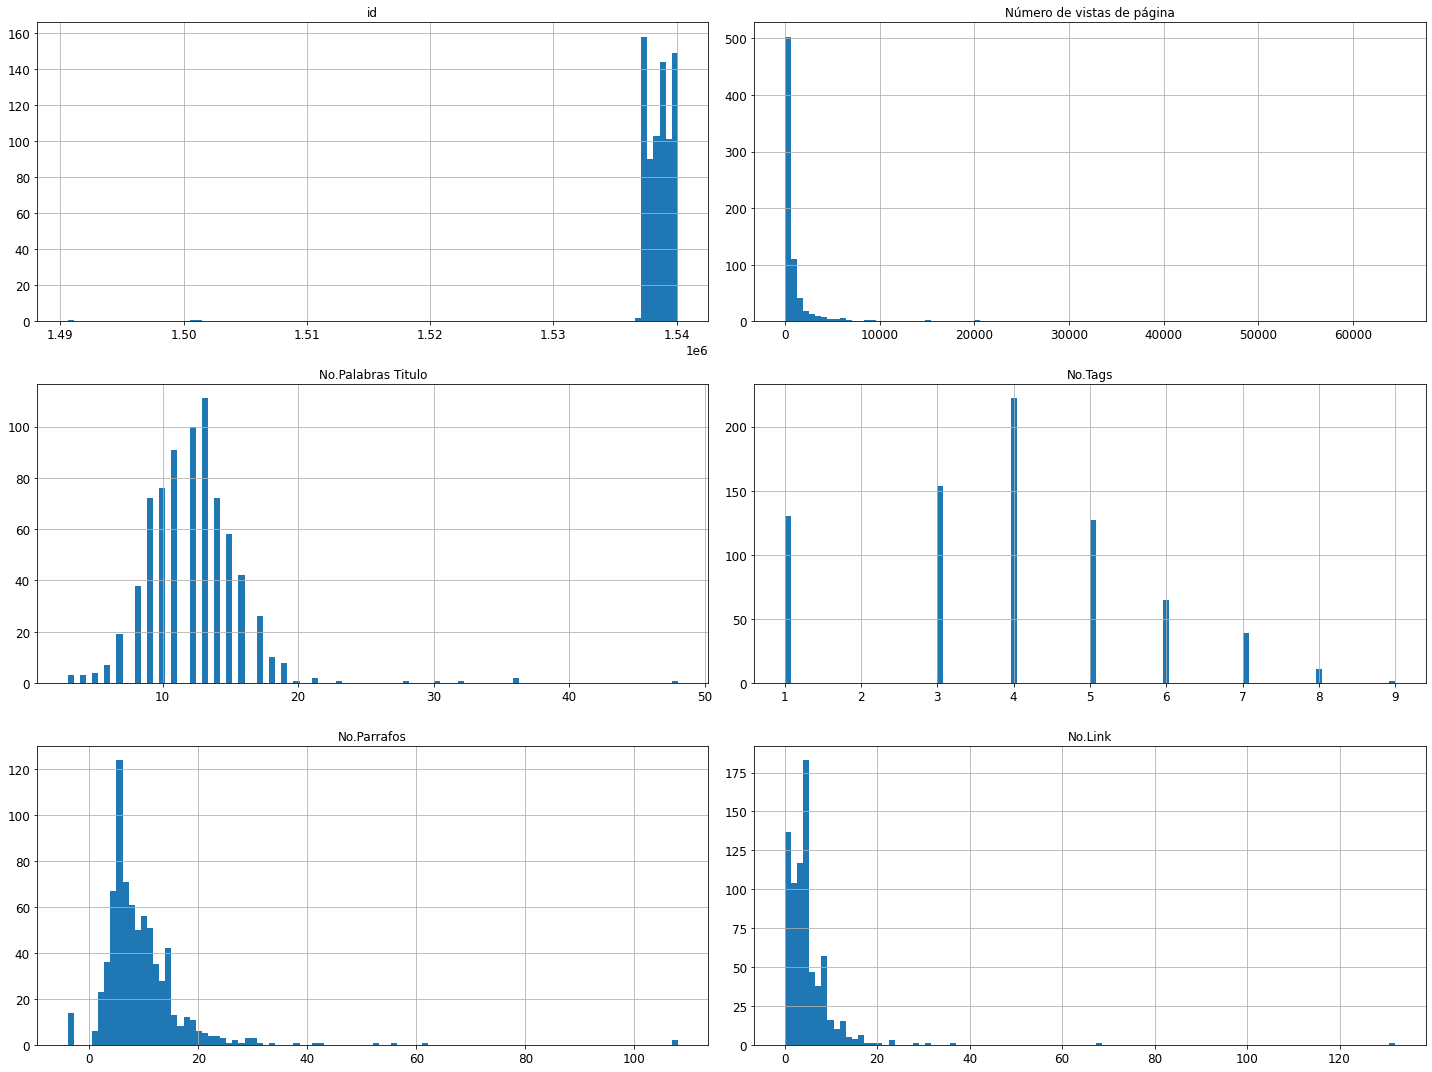

In [35]:

%matplotlib inline
import matplotlib.pyplot as plt
dfnotas.hist(bins=100, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [43]:
dfnotas
corr_matrix = dfnotas.corr()
corr_matrix['Número de vistas de página'].sort_values(ascending=False)

Número de vistas de página    1.000000
No.Tags                       0.121380
No.Parrafos                   0.113459
No.Palabras Titulo            0.098174
No.Link                       0.066083
id                           -0.118736
Name: Número de vistas de página, dtype: float64

In [49]:
corr_matrix['No.Link'].sort_values(ascending=False)

No.Link                       1.000000
No.Parrafos                   0.418335
No.Palabras Titulo            0.068784
Número de vistas de página    0.066083
id                            0.035219
No.Tags                       0.018689
Name: No.Link, dtype: float64